### Case Study 4 :  Data Science Shark Tank

***Due Date: December 8, before 6pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 5:59pm on Nov 18. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on Dec 9.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!
 
 ![Bilby Stampede](https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg)

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

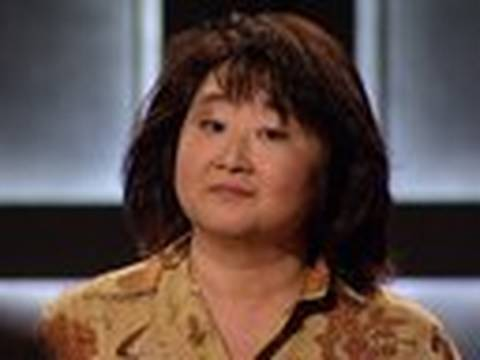

In [1]:
# Should your project be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

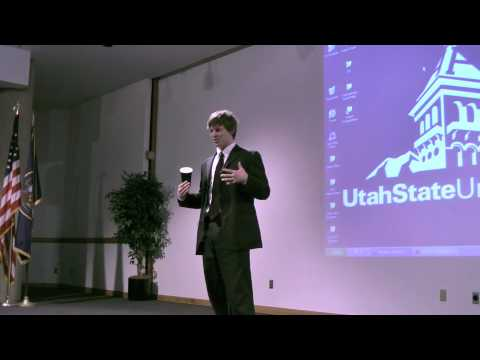

In [2]:
# Or should your project be like this?

YouTubeVideo("i6O98o2FRHw") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


** APIs **
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [3]:
# imports
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import random
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn import model_selection, linear_model, feature_selection, metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Feature Engineering:
# For our target variable, we chose to combine the promotion columns into one feature in which
# 0 represents if the customer did not accept the promotion, 1-6 represents if the customer did 
# accept the promotion on the respective campaign.

marketing_data = pd.read_csv("marketing_campaign.csv", delimiter="\t")
marketing_data = marketing_data.dropna()

campaign_accepted = np.repeat(0, len(marketing_data))

campaign_accepted[marketing_data["Response"] == 1] = 6

for i in range(5,0,-1):
    column_name = "AcceptedCmp" + str(i)
    campaign_accepted[marketing_data[column_name] == 1] = i

marketing_data.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)
marketing_data["CampaignAccepted"] = campaign_accepted

enroll_year = []
for i in marketing_data['Dt_Customer']:
    enroll_year.append(int(i[-4:]))
marketing_data["Enroll_Year"] = enroll_year

marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CampaignAccepted,Enroll_Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,3,11,6,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,3,11,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,0,3,11,0,2013
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,0,3,11,1,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,0,3,11,4,2014
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,0,3,11,0,2014


In [5]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CampaignAccepted,Enroll_Year
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,3.0,11.0,0.981498,2013.028430
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,0.0,0.0,1.865481,0.685618
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000,2013.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000,2013.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,1.000000,2013.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,6.000000,2014.000000


Text(0.5, 1.0, 'nth Campaign Accepted Distribution')

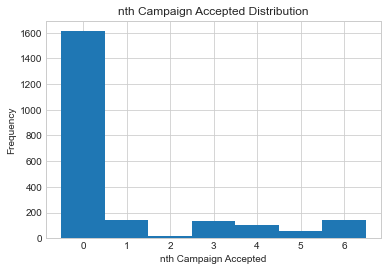

In [6]:
#campaign accepted distribution
plt.hist(x=marketing_data['CampaignAccepted'], bins=7, range=[-0.5,6.5])
plt.xlabel('nth Campaign Accepted')
plt.ylabel("Frequency")
plt.title("nth Campaign Accepted Distribution")

Surprised that most people don't accept any campaign. It makes sense the 6th campaign is more effective than others since
the company is able to detect the customers' needs and customize the campaign accordingly.

Conjecture: the product doesn't meet the majority of customers' need or they spend the promotion on the wrong group of people

Text(0.5, 1.0, 'Income Distribution For Income < $100,000')

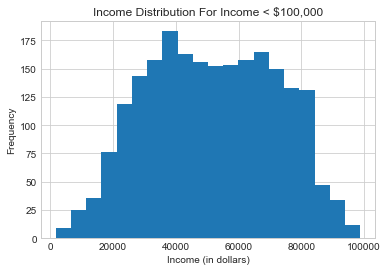

In [7]:
#income distribution from <100000
income_dist_under_100K = pysqldf("SELECT * FROM marketing_data WHERE Income < 100000")

plt.hist(x=income_dist_under_100K['Income'], bins='auto')
plt.xlabel('Income (in dollars)')
plt.ylabel("Frequency")
plt.title("Income Distribution For Income < $100,000")

In [8]:
#Accepted promotions by income group
Poor = pysqldf("SELECT * FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT * FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions by income group')

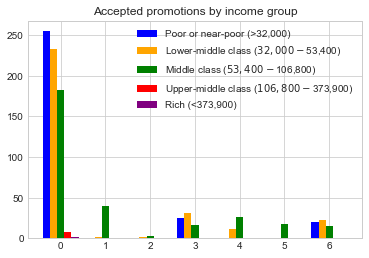

In [9]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions by income group")

Poor or near-poor spend less than other income classes. Upper-middle class and Rich tend to be picky and don't accept any promotions. Poor or near-poor, Lower-middle and Middle class tend to wait till the last promotion

Conjecture: The products meet the needs of more poor to middle class than upper-middle and rich class

Products featured in data are wine, fruits, meat, fish, sweets, gold.

Prediction: Uppder-middle and rich will more likely to accept wine and gold promotion. Household with kides will more likely to accept sweets

Text(0.5, 1.0, 'Relationship between wine spending and income class')

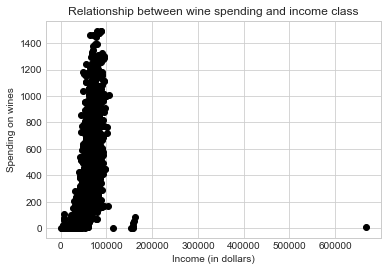

In [10]:
# Scatter plot for spending of wines in relation with income class
plt.plot(marketing_data['Income'], marketing_data['MntWines'],'o', color="Black")
plt.xlabel('Income (in dollars)')
plt.ylabel("Spending on wines")
plt.title("Relationship between wine spending and income class")

In [11]:
def create_scatter_plot(title, prod_name, product, income_class, correlation):
    plt.scatter(income_class, product)
    plt.title(title)
    plt.xlabel("Income (in dollars)")
    plt.ylabel(prod_name)
    plt.figtext(0.15, 0.8, "Correlation: "+str(correlation))

In [12]:
def calculate_correlation(product, income_class):
    data = {'Product': product, 'Income': income_class}
    product_and_income = pd.DataFrame(data)
    corr = product_and_income.corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    return round(corr.value[1],4)

Correlation: 
0.7339


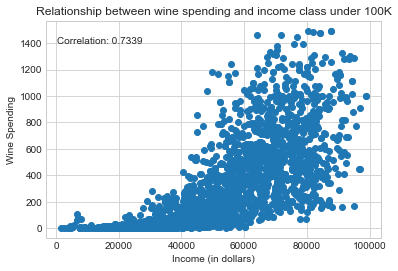

In [13]:
# Scatter plot for spending of wines in relation with income class
product = income_dist_under_100K['MntWines'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between wine spending and income class under 100K", "Wine Spending", product, income_dist_under_100K['Income'].values, corr)
print("Correlation: ")
print(corr)

Correlation: 
0.5384


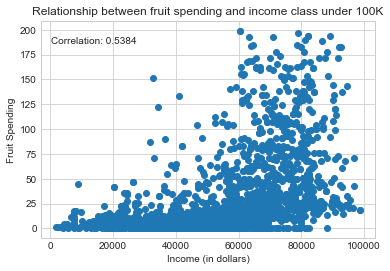

In [14]:
# Scatter plot for spending of fruits in relation with income class
product = income_dist_under_100K['MntFruits'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between fruit spending and income class under 100K", "Fruit Spending", product,income_dist_under_100K['Income'].values,corr)
print("Correlation: ")
print(corr)

Correlation: 
0.7089


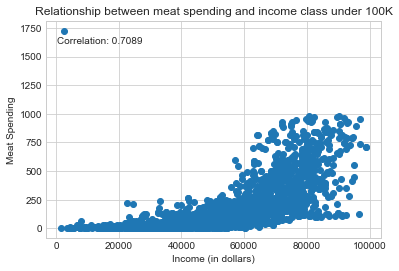

In [15]:
# Scatter plot for spending of meat in relation with income class
product = income_dist_under_100K['MntMeatProducts'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between meat spending and income class under 100K", "Meat Spending", product,income_dist_under_100K['Income'].values, corr)
print("Correlation: ")
print(corr)

Correlation: 
0.5541


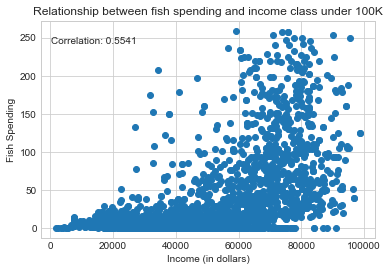

In [16]:
# Scatter plot for spending of fish in relation with income class
product = income_dist_under_100K['MntFishProducts'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between fish spending and income class under 100K", "Fish Spending", product,income_dist_under_100K['Income'].values, corr)
print("Correlation: ")
print(corr)

Correlation: 
0.5506


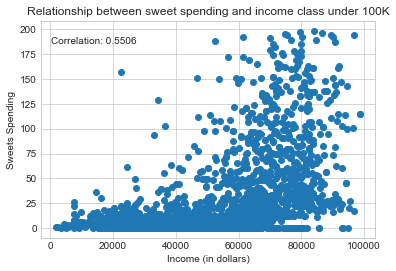

In [17]:
# Scatter plot for spending of sweets in relation with income class
product = income_dist_under_100K['MntSweetProducts'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between sweet spending and income class under 100K", "Sweets Spending", product,income_dist_under_100K['Income'].values,corr)
print("Correlation: ")
print(corr)

Correlation: 
0.4158


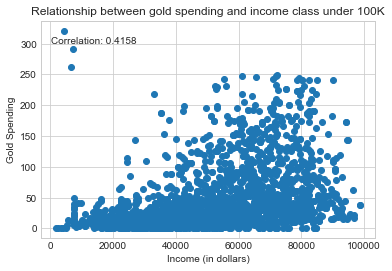

In [18]:
# Scatter plot for spending of gold in relation with income class
product = income_dist_under_100K['MntGoldProds'].values
corr = calculate_correlation(product,income_dist_under_100K['Income'].values)
create_scatter_plot("Relationship between gold spending and income class under 100K", "Gold Spending", product,income_dist_under_100K['Income'].values,corr)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Doesn't seem like there is a clear trend between gold spending and income class. Meanwhile, there is a clearer linear relationship between meat and wine spending and income class

Conjecture: Focus our promotion for meat and wine on upper class can potentially generate more profit.

In [19]:
# meat, income, promotion accepted
Poor = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300 #random sample

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions for meat by income group')

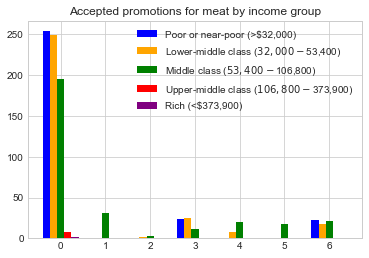

In [20]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>$32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<$373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for meat by income group")

In [21]:
# meat, income, promotion accepted
Poor = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300 #random sample

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions for wine by income group')

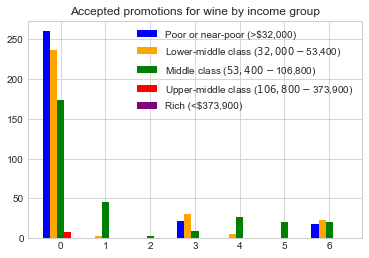

In [22]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>$32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<$373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for wine by income group")

Text(0.5, 1.0, 'Accepted promotions by enrolled year')

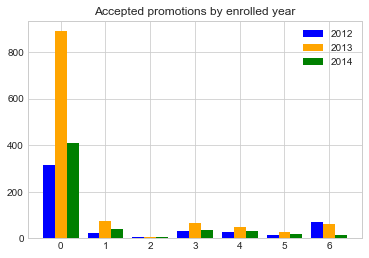

In [23]:
promo_2012 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2012")['CampaignAccepted'].values
promo_2013 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2013")['CampaignAccepted'].values
promo_2014 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2014")['CampaignAccepted'].values

promo_by_enroll_year = []
promo_by_enroll_year.append(list(promo_2012))
promo_by_enroll_year.append(list(promo_2013))
promo_by_enroll_year.append(list(promo_2014))

fig,ax = plt.subplots()
labels = ['2012', '2013', '2014']
colors = ['blue','orange','green']
ax.hist(promo_by_enroll_year, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions by enrolled year")

Conjecture: The longer the cusomters staty with the company, the higher chance they will accept the later promotion.

Text(0.5, 1.0, 'Accepted promotions for sweets by number of kids in the household')

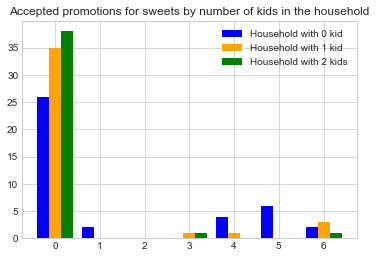

In [24]:
kid_home_0 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 0")['CampaignAccepted'].values
kid_home_1 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 1")['CampaignAccepted'].values
kid_home_2 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 2")['CampaignAccepted'].values

n=40 #random sample

promo_by_kidyear = []
promo_by_kidyear.append(random.sample(list(kid_home_0),n))
promo_by_kidyear.append(random.sample(list(kid_home_1),n))
promo_by_kidyear.append(random.sample(list(kid_home_2),n))

fig,ax = plt.subplots()
labels = ['Household with 0 kid', 'Household with 1 kid', 'Household with 2 kids']
colors = ['blue','orange','green']
ax.hist(promo_by_kidyear, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for sweets by number of kids in the household")

Correlation: 
-0.378


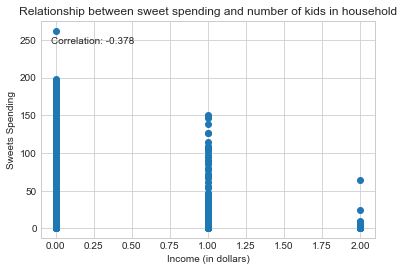

In [25]:
product = marketing_data['MntSweetProducts'].values
corr = calculate_correlation(product,marketing_data['Kidhome'].values)
create_scatter_plot("Relationship between sweet spending and number of kids in household", "Sweets Spending", product, marketing_data['Kidhome'].values, corr)
print("Correlation: ")
print(corr)

Text(0.5, 1.0, 'Accepted promotions for sweets by number of teens in the household')

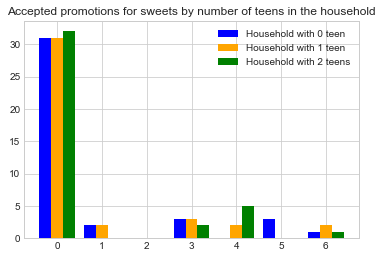

In [26]:
kid_home_0 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 0")['CampaignAccepted'].values
kid_home_1 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 1")['CampaignAccepted'].values
kid_home_2 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 2")['CampaignAccepted'].values

n = 40

promo_by_kidyear = []
promo_by_kidyear.append(random.sample(list(kid_home_0),n))
promo_by_kidyear.append(random.sample(list(kid_home_1),n))
promo_by_kidyear.append(random.sample(list(kid_home_2),n))

fig,ax = plt.subplots()
labels = ['Household with 0 teen', 'Household with 1 teen', 'Household with 2 teens']
colors = ['blue','orange','green']
ax.hist(promo_by_kidyear, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for sweets by number of teens in the household")

Correlation: 
-0.1631


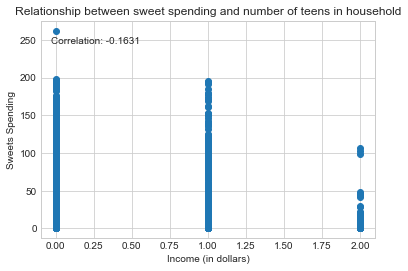

In [27]:
product = marketing_data['MntSweetProducts'].values
corr=calculate_correlation(product,marketing_data['Teenhome'].values)
create_scatter_plot("Relationship between sweet spending and number of teens in household", "Sweets Spending", product, marketing_data['Teenhome'].values,corr)
print("Correlation: ")
print(corr)

Conjecture: Household with one or less kid/teens tend to spend more on sweets. Probably because they are more wealthy and able to afford more of these treats than household with 2 kids/teens. Household with teens spend more sweets comepare to kids becasue teens tend to throw party and will purchase more of these treats

Final conjecture:

- Focus more on midddle class and don't invest on upper or rich class
- Meat and wine attracts middle income more

Text(0.5, 1.0, 'Accepted Campaigns by Age Group')

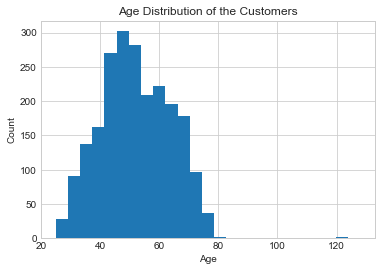

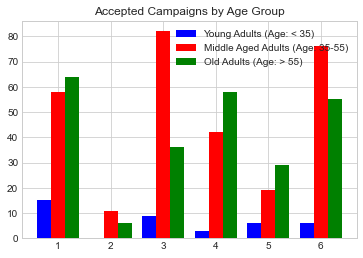

In [28]:
# AGE ANALYSIS

# Acquire the birth year and campaign number information
marketing_data_age = marketing_data.loc[:,['Year_Birth', 'CampaignAccepted']]
marketing_data_age.loc[:,'Age'] = 2021 - marketing_data_age.loc[:,'Year_Birth']

# Age distrubution of the customers
plt.hist(x=marketing_data_age["Age"], bins=25)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age Distribution of the Customers')

# Remove the customers who did not accept the campaign
marketing_data_age_filtered1 = marketing_data_age[marketing_data_age.CampaignAccepted != 0]

# Put customers into age groups
young = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age < 35")['CampaignAccepted'].values
middle = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age > 35 AND Age < 55")['CampaignAccepted'].values
old = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age > 55")['CampaignAccepted'].values

accepted_campaign_by_age = [] #list
accepted_campaign_by_age.append(list(young))
accepted_campaign_by_age.append(list(middle))
accepted_campaign_by_age.append(list(old))

fig,ax = plt.subplots()
labels = ['Young Adults (Age: < 35)', 'Middle Aged Adults (Age: 35-55)', 'Old Adults (Age: > 55)']
colors = ['blue','red','green']
ax.hist(accepted_campaign_by_age, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Age Group")

In [29]:
# Find the ratio of a campaign acceptance number to the whole for each age group 
young_list = young.tolist()
middle_list = middle.tolist()
old_list = old.tolist()

young_number = len(young_list)
middle_number = len(middle_list)
old_number = len(old_list)

young_ratio_1 = 100*young_list.count(1)/young_number
young_ratio_2 = 100*young_list.count(2)/young_number
young_ratio_3 = 100*young_list.count(3)/young_number
young_ratio_4 = 100*young_list.count(4)/young_number
young_ratio_5 = 100*young_list.count(5)/young_number
young_ratio_6 = 100*young_list.count(6)/young_number

middle_ratio_1 = 100*middle_list.count(1)/middle_number
middle_ratio_2 = 100*middle_list.count(2)/middle_number
middle_ratio_3 = 100*middle_list.count(3)/middle_number
middle_ratio_4 = 100*middle_list.count(4)/middle_number
middle_ratio_5 = 100*middle_list.count(5)/middle_number
middle_ratio_6 = 100*middle_list.count(6)/middle_number

old_ratio_1 = 100*old_list.count(1)/old_number
old_ratio_2 = 100*old_list.count(2)/old_number
old_ratio_3 = 100*old_list.count(3)/old_number
old_ratio_4 = 100*old_list.count(4)/old_number
old_ratio_5 = 100*old_list.count(5)/old_number
old_ratio_6 = 100*old_list.count(6)/old_number

age_ratios = [[young_ratio_1, young_ratio_2, young_ratio_3, young_ratio_4, young_ratio_5, young_ratio_6],[middle_ratio_1, middle_ratio_2, middle_ratio_3, middle_ratio_4, middle_ratio_5, middle_ratio_6], [old_ratio_1, old_ratio_2, old_ratio_3, old_ratio_4, old_ratio_5, old_ratio_6]]

print(age_ratios)

[[38.46153846153846, 0.0, 23.076923076923077, 7.6923076923076925, 15.384615384615385, 15.384615384615385], [20.13888888888889, 3.8194444444444446, 28.47222222222222, 14.583333333333334, 6.597222222222222, 26.38888888888889], [25.806451612903224, 2.4193548387096775, 14.516129032258064, 23.387096774193548, 11.693548387096774, 22.177419354838708]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Age Groups')

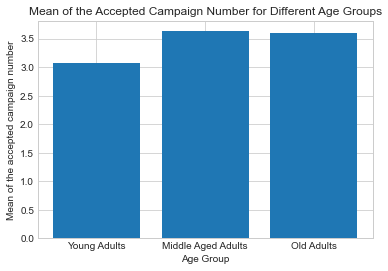

In [30]:
# Find the mean of the accepted campaign for each age group

mean_young = sum(young_list)/young_number
mean_middle = sum(middle_list)/middle_number
mean_old = sum(old_list)/old_number

y_mean = [mean_young, mean_middle, mean_old]
x_mean = ['Young Adults', 'Middle Aged Adults', 'Old Adults']

fig,ax = plt.subplots(1)
ax.bar(x_mean,y_mean)
plt.xlabel('Age Group')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Age Groups')

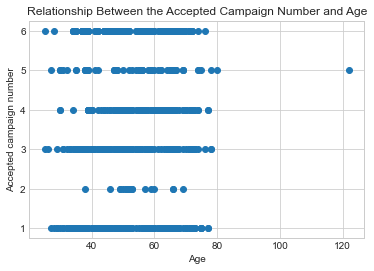

0.028409230911276936

In [31]:
# Correlation between age and campaign number accepted
plt.scatter(marketing_data_age_filtered1.Age, marketing_data_age_filtered1.CampaignAccepted)
plt.xlabel('Age')
plt.ylabel('Accepted campaign number')
plt.title('Relationship Between the Accepted Campaign Number and Age')
plt.show()
corr, _ = pearsonr(marketing_data_age_filtered1.Age, marketing_data_age_filtered1.CampaignAccepted)
corr

Text(0.5, 1.0, 'Age Distribution of the Customers who did not Accept the Offer')

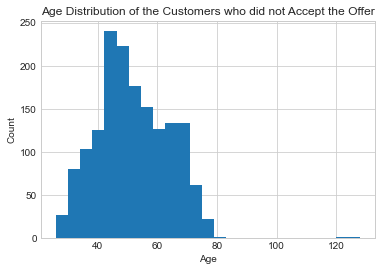

In [32]:
# Include only the customers that did not accept the campaign
marketing_data_age_filtered2 = marketing_data_age[marketing_data_age.CampaignAccepted == 0]

# Histogram plot of the age groups that did not accept the campaign 
plt.hist(x=marketing_data_age_filtered2["Age"], bins=25)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age Distribution of the Customers who did not Accept the Offer')

Text(0.5, 1.0, 'Age Distribution of the Customers who did not Accept the Offer')

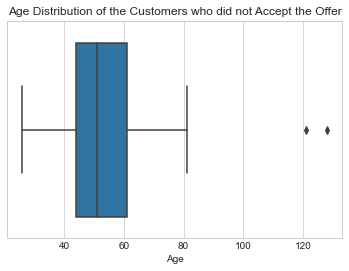

In [33]:
sns.boxplot(x=marketing_data_age_filtered2["Age"])
plt.title('Age Distribution of the Customers who did not Accept the Offer')

In [34]:
# Put customers into age groups
young_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age < 35")
middle_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age > 35 AND Age < 55")
old_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age > 55")

young_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age < 35")
middle_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age > 35 AND Age < 55")
old_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age > 55")

# Find the likelihood of each group to reject a campaign
young_reject = len(young_nocamp)/len(young_total)
middle_reject = len(middle_nocamp)/len(middle_total)
old_reject = len(old_nocamp)/len(old_total)

reject_likelihood = [young_reject, middle_reject, old_reject]
print(reject_likelihood)

[0.7328767123287672, 0.7451327433628319, 0.7078916372202592]


Text(0.5, 1.0, 'Accepted Campaigns by Education Level')

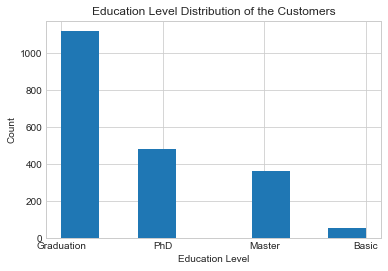

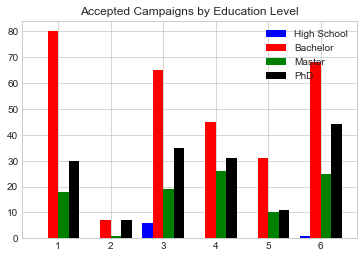

In [35]:
# EDUCATION LEVEL ANALYSIS

marketing_data_education = marketing_data[['Education', 'CampaignAccepted']]
# Remove the unidentified column: 2ncycle. It is not clear what  these education level corresponds to
marketing_data_education = marketing_data_education[marketing_data_education.Education != '2n Cycle']

# Education level distrubution of the customers
plt.hist(x=marketing_data_education["Education"], bins=8)
plt.xlabel('Education Level')
plt.ylabel("Count")
plt.title('Education Level Distribution of the Customers')

# Include only the customers that accepted the campaign
marketing_data_education_filtered1 = marketing_data_education[marketing_data_education.CampaignAccepted != 0]

# Put customers into education groups
bachelor = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Graduation'")['CampaignAccepted'].values
phd = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'PhD' ")['CampaignAccepted'].values
master = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Master'")['CampaignAccepted'].values
high_school = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Basic' ")['CampaignAccepted'].values

accepted_campaign_by_education = [] #list
accepted_campaign_by_education.append(list(high_school))
accepted_campaign_by_education.append(list(bachelor))
accepted_campaign_by_education.append(list(master))
accepted_campaign_by_education.append(list(phd))


fig,ax = plt.subplots()
labels = ['High School', 'Bachelor', 'Master', 'PhD']
colors = ['blue','red','green', 'black']
ax.hist(accepted_campaign_by_education, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Education Level")

In [36]:

# Find the ratio of a campaign acceptance number to the whole for each education level 
high_list = high_school.tolist()
bachelor_list = bachelor.tolist()
master_list = master.tolist()
phd_list = phd.tolist()

high_number = len(high_list)
bachelor_number = len(bachelor_list)
master_number = len(master_list)
phd_number = len(phd_list)

high_ratio_1 = 100*high_list.count(1)/high_number
high_ratio_2 = 100*high_list.count(2)/high_number
high_ratio_3 = 100*high_list.count(3)/high_number
high_ratio_4 = 100*high_list.count(4)/high_number
high_ratio_5 = 100*high_list.count(5)/high_number
high_ratio_6 = 100*high_list.count(6)/high_number

bachelor_ratio_1 = 100*bachelor_list.count(1)/bachelor_number
bachelor_ratio_2 = 100*bachelor_list.count(2)/bachelor_number
bachelor_ratio_3 = 100*bachelor_list.count(3)/bachelor_number
bachelor_ratio_4 = 100*bachelor_list.count(4)/bachelor_number
bachelor_ratio_5 = 100*bachelor_list.count(5)/bachelor_number
bachelor_ratio_6 = 100*bachelor_list.count(6)/bachelor_number

master_ratio_1 = 100*master_list.count(1)/master_number
master_ratio_2 = 100*master_list.count(2)/master_number
master_ratio_3 = 100*master_list.count(3)/master_number
master_ratio_4 = 100*master_list.count(4)/master_number
master_ratio_5 = 100*master_list.count(5)/master_number
master_ratio_6 = 100*master_list.count(6)/master_number

phd_ratio_1 = 100*phd_list.count(1)/phd_number
phd_ratio_2 = 100*phd_list.count(2)/phd_number
phd_ratio_3 = 100*phd_list.count(3)/phd_number
phd_ratio_4 = 100*phd_list.count(4)/phd_number
phd_ratio_5 = 100*phd_list.count(5)/phd_number
phd_ratio_6 = 100*phd_list.count(6)/phd_number

education_ratios = [[high_ratio_1, high_ratio_2, high_ratio_3, high_ratio_4, high_ratio_5, high_ratio_6],[bachelor_ratio_1, bachelor_ratio_2, bachelor_ratio_3, bachelor_ratio_4, bachelor_ratio_5, bachelor_ratio_6], [master_ratio_1, master_ratio_2, master_ratio_3, master_ratio_4, master_ratio_5, master_ratio_6], [phd_ratio_1, phd_ratio_2, phd_ratio_3, phd_ratio_4, phd_ratio_5, phd_ratio_6]]

print(education_ratios)

[[0.0, 0.0, 85.71428571428571, 0.0, 0.0, 14.285714285714286], [27.027027027027028, 2.364864864864865, 21.95945945945946, 15.202702702702704, 10.472972972972974, 22.972972972972972], [18.181818181818183, 1.0101010101010102, 19.19191919191919, 26.262626262626263, 10.1010101010101, 25.252525252525253], [18.9873417721519, 4.430379746835443, 22.151898734177216, 19.620253164556964, 6.962025316455696, 27.848101265822784]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Education Levels')

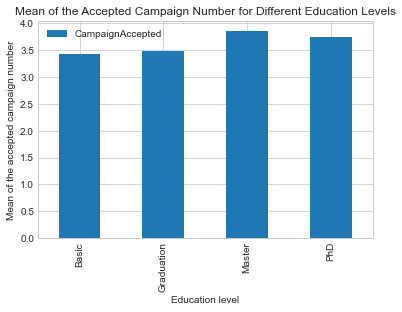

In [37]:
# Find the mean of the accepted campaign number for each education level
#  Group rows from marketing_data_age into lists by the age
marketing_data_education_grouped1 = marketing_data_education_filtered1.groupby('Education').mean()

# Plot the data
ax = marketing_data_education_grouped1.plot.bar(y = 'CampaignAccepted')
plt.xlabel('Education level')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Education Levels')

In [38]:
# Include only the customers that did not accept the campaign
marketing_data_education_filtered2 = marketing_data_education[marketing_data_education.CampaignAccepted == 0]

marketing_data_education_grouped2 = marketing_data_education_filtered2.groupby('Education').size().reset_index(name='Counts')

In [39]:
# Put customers into age groups
bachelor_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Graduation'")
phd_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'PhD' ")
master_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Master'")
high_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Basic' ")

bachelor_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Graduation'")
phd_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'PhD' ")
master_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Master'")
high_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Basic' ")

# Find the likelihood of each group to reject a campaign
bachelor_reject = len(bachelor_nocamp)/len(bachelor_total)
phd_reject = len(phd_nocamp)/len(phd_total)
master_reject = len(master_nocamp)/len(master_total)
high_reject = len(high_nocamp)/len(high_total)

reject_likelihood2 = [high_reject, bachelor_reject, master_reject, phd_reject]
print(reject_likelihood2)

[0.8703703703703703, 0.7347670250896058, 0.7287671232876712, 0.6715176715176715]


Text(0.5, 1.0, 'Accepted Campaigns by Marital Status')

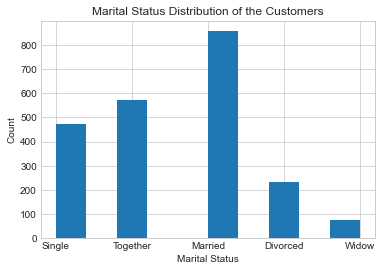

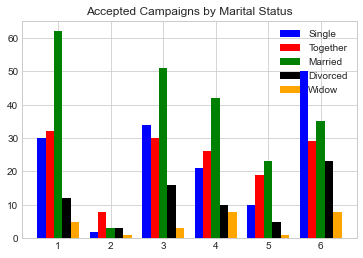

In [40]:
# MARITAL STATUS ANALYSIS

marketing_data_ms = marketing_data[['Marital_Status', 'CampaignAccepted']]

# Remove the unidentified columns: absurd, YOLO and alone.
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'Absurd']
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'Alone']
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'YOLO']

# Education level distrubution of the customers
plt.hist(x=marketing_data_ms["Marital_Status"], bins=10)
plt.xlabel('Marital Status')
plt.ylabel("Count")
plt.title('Marital Status Distribution of the Customers')

# Include only the customers that accepted the campaign
marketing_data_ms_filtered1 = marketing_data_ms[marketing_data_ms.CampaignAccepted != 0]

# Put customers into marital status groups
single = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Single'")['CampaignAccepted'].values
together = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Together'")['CampaignAccepted'].values
married = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Married'")['CampaignAccepted'].values
divorced = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Divorced'")['CampaignAccepted'].values
widow = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Widow'")['CampaignAccepted'].values

accepted_campaign_by_ms = [] #list
accepted_campaign_by_ms.append(list(single))
accepted_campaign_by_ms.append(list(together))
accepted_campaign_by_ms.append(list(married))
accepted_campaign_by_ms.append(list(divorced))
accepted_campaign_by_ms.append(list(widow))


fig,ax = plt.subplots()
labels = ['Single', 'Together', 'Married', 'Divorced', 'Widow']
colors = ['blue','red','green', 'black', 'orange']
ax.hist(accepted_campaign_by_ms, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Marital Status")

In [41]:
# Find the ratio of a campaign acceptance number to the whole for each education level 
single_list = single.tolist()
together_list = together.tolist()
married_list = married.tolist()
divorced_list = divorced.tolist()
widow_list = widow.tolist()

single_number = len(single_list)
together_number = len(together_list)
married_number = len(married_list)
divorced_number = len(divorced_list)
widow_number = len(widow_list)

single_ratio_1 = 100*single_list.count(1)/single_number
single_ratio_2 = 100*single_list.count(2)/single_number
single_ratio_3 = 100*single_list.count(3)/single_number
single_ratio_4 = 100*single_list.count(4)/single_number
single_ratio_5 = 100*single_list.count(5)/single_number
single_ratio_6 = 100*single_list.count(6)/single_number

together_ratio_1 = 100*together_list.count(1)/together_number
together_ratio_2 = 100*together_list.count(2)/together_number
together_ratio_3 = 100*together_list.count(3)/together_number
together_ratio_4 = 100*together_list.count(4)/together_number
together_ratio_5 = 100*together_list.count(5)/together_number
together_ratio_6 = 100*together_list.count(6)/together_number

married_ratio_1 = 100*married_list.count(1)/married_number
married_ratio_2 = 100*married_list.count(2)/married_number
married_ratio_3 = 100*married_list.count(3)/married_number
married_ratio_4 = 100*married_list.count(4)/married_number
married_ratio_5 = 100*married_list.count(5)/married_number
married_ratio_6 = 100*married_list.count(6)/married_number

divorced_ratio_1 = 100*divorced_list.count(1)/divorced_number
divorced_ratio_2 = 100*divorced_list.count(2)/divorced_number
divorced_ratio_3 = 100*divorced_list.count(3)/divorced_number
divorced_ratio_4 = 100*divorced_list.count(4)/divorced_number
divorced_ratio_5 = 100*divorced_list.count(5)/divorced_number
divorced_ratio_6 = 100*divorced_list.count(6)/divorced_number

widow_ratio_1 = 100*widow_list.count(1)/widow_number
widow_ratio_2 = 100*widow_list.count(2)/widow_number
widow_ratio_3 = 100*widow_list.count(3)/widow_number
widow_ratio_4 = 100*widow_list.count(4)/widow_number
widow_ratio_5 = 100*widow_list.count(5)/widow_number
widow_ratio_6 = 100*widow_list.count(6)/widow_number

ms_ratios = [[single_ratio_1, single_ratio_2, single_ratio_3, single_ratio_4, single_ratio_5, single_ratio_6],[together_ratio_1, together_ratio_2, together_ratio_3, together_ratio_4, together_ratio_5, together_ratio_6], [married_ratio_1, married_ratio_2, married_ratio_3, married_ratio_4, married_ratio_5, married_ratio_6], [divorced_ratio_1, divorced_ratio_2, divorced_ratio_3, divorced_ratio_4, divorced_ratio_5, divorced_ratio_6],[widow_ratio_1, widow_ratio_2, widow_ratio_3, widow_ratio_4, widow_ratio_5, widow_ratio_6]]

print(ms_ratios)

[[20.408163265306122, 1.3605442176870748, 23.12925170068027, 14.285714285714286, 6.802721088435374, 34.01360544217687], [22.22222222222222, 5.555555555555555, 20.833333333333332, 18.055555555555557, 13.194444444444445, 20.13888888888889], [28.703703703703702, 1.3888888888888888, 23.61111111111111, 19.444444444444443, 10.648148148148149, 16.203703703703702], [17.391304347826086, 4.3478260869565215, 23.18840579710145, 14.492753623188406, 7.246376811594203, 33.333333333333336], [19.23076923076923, 3.8461538461538463, 11.538461538461538, 30.76923076923077, 3.8461538461538463, 30.76923076923077]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Marital Statuses')

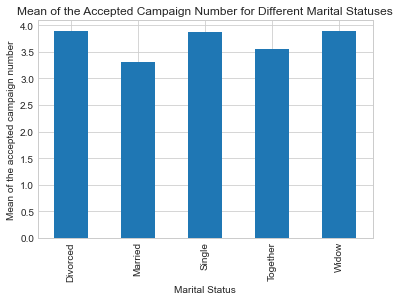

In [42]:
# Find the mean of the accepted campaign number for each marital status
#  Group rows from marketing_data_age into lists by the age
marketing_data_ms_grouped = marketing_data_ms_filtered1.groupby('Marital_Status').mean()

# Plot the data
ax = marketing_data_ms_grouped.plot.bar(y = 'CampaignAccepted', legend = None)
plt.xlabel('Marital Status')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Marital Statuses')

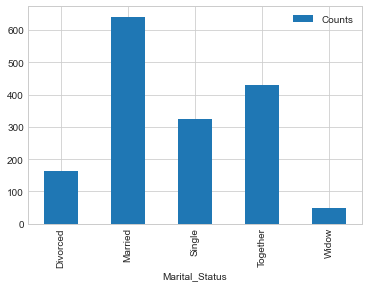

In [43]:
# Include only the customers that did not accept the campaign
marketing_data_ms_filtered2 = marketing_data_ms[marketing_data_ms.CampaignAccepted == 0]

marketing_data_ms_grouped2 = marketing_data_ms_filtered2.groupby('Marital_Status').size().reset_index(name='Counts')

# Plot the data
ax = marketing_data_ms_grouped2.plot.bar(x = 'Marital_Status' , y = 'Counts')

In [44]:
# Put customers into age groups
single_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Single'")
together_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Together' ")
married_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Married'")
divorced_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Divorced' ")
widow_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Widow' ")

single_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Single'")
together_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Together' ")
married_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Married'")
divorced_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Divorced' ")
widow_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Widow' ")

# Find the likelihood of each group to reject a campaign
single_reject = len(single_nocamp)/len(single_total)
together_reject = len(together_nocamp)/len(together_total)
married_reject = len(together_nocamp)/len(together_total)
divorced_reject = len(divorced_nocamp)/len(divorced_total)
widow_reject = len(widow_nocamp)/len(widow_total)

reject_likelihood3 = [single_reject, together_reject, married_reject, divorced_reject, widow_reject]
print(reject_likelihood3)

[0.6878980891719745, 0.7486910994764397, 0.7486910994764397, 0.7025862068965517, 0.6578947368421053]


In [45]:
def normalize_columns(data, columns):
    for col in columns:
        _min = np.min(data[col])
        _max = np.max(data[col])
        data[col] = (data[col] - _min) / (_max - _min)
    return data

spending_vals = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
marketing_data = normalize_columns(marketing_data, spending_vals)

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


Models based upon our conjectures on **income**

In [46]:
# Building model to predict whether a customer is going to accept a promotion or not
# Prep data
# Make a copy of the original data. Create a column that has 0s (did not accept campaign) and 1s (accepted campaign)
y_model1 = np.repeat(0, len(marketing_data))
for i in range(0,len(marketing_data)):
    record = marketing_data.iloc[i]
    if record['CampaignAccepted'] !=0:
        y_model1[i] = 1 

In [47]:
# modidfy income to just income class (reduce to just 5 values)
income_class = np.repeat(0, len(marketing_data))
for i in range(0,len(marketing_data)):
    record = marketing_data.iloc[i]
    if record['Income'] < 32000:
        income_class[i] = 32000
    if 32000 < record['Income'] < 53400:
         income_class[i] = 53400
    if 53400 < record['Income'] < 106800:
         income_class[i] = 106800
    if 106800 < record['Income'] < 373900:
         income_class[i] = 373900
    if 373900 < record['Income']:
         income_class[i] = 400000
marketing_data['Income'] = income_class

In [48]:
#1-wine, 2-fruit, 3-meat, 4-fish, 5-sweet, 6-gold
most_purchased_prod = []#np.repeat(0, len(marketing_data))
for i in range(0,len(marketing_data)):
    record = marketing_data.iloc[i]
    max_prod = []
    for col in spending_vals:
        max_prod.append(record[col])
    prod_num = max_prod.index(max(max_prod))+1
    most_purchased_prod.append(prod_num)
marketing_data["Most purchased product"] = most_purchased_prod   

In [49]:
x = marketing_data.loc[:,['Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases']]
y_model1 = y_model1.ravel()

In [50]:
#LOGISTIC REGRESSION ACCUARCY SCORE FOR MODEL WHETHER THE CUSTOMER ACCEPT THE CAMPAIGN OR NOT
x_train, x_test, y_model1_train, y_model1_test = model_selection.train_test_split(x, y_model1, train_size=0.8, random_state=5681)
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(x_train,y_model1_train)
print('training accuracy')
print(accuracy_score(y_model1_train,clf.predict(x_train)))
print('testing accuracy')
print(accuracy_score(y_model1_test,clf.predict(x_test)))

training accuracy
0.7257336343115124
testing accuracy
0.7319819819819819


In [51]:
marketing_data_filtered1 = marketing_data[marketing_data.CampaignAccepted != 0]
x_model2 = marketing_data_filtered1.loc[:,['Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases']]
y_model2 = marketing_data_filtered1.loc[:,'CampaignAccepted'].ravel()

In [52]:
#LOGISTIC REGRESSION ACCUARCY SCORE FOR MODEL PREDICT WHICH CAMPAIGN THE CUSTOMER ACCEPT
x_train, x_test, y_model2_train, y_model2_test = model_selection.train_test_split(x_model2, y_model2, train_size=0.8, random_state=5681)
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(x_train,y_model2_train)
print('training accuracy')
print(accuracy_score(y_model2_train,clf.predict(x_train)))
print('testing accuracy')
print(accuracy_score(y_model2_test,clf.predict(x_test)))

training accuracy
0.22933884297520662
testing accuracy
0.256198347107438


Apprently income decrease the accuracy score and web purchases increase accuary score

Models based on our conjectures regarding **education**, **marital status**, and **birth year**

In [53]:
# Part-1 predicting the campaign number

# Include only the customers that accepted the campaign at some point
marketing_data_filtered1 = marketing_data[marketing_data.CampaignAccepted != 0]

# Create the training and test sets
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(marketing_data_filtered1, test_size=0.1)

# Define functions to transform string entries to integers 

def transform_education(row):
    if row['Education'] == '2n Cycle':
        return 1
    elif row['Education'] == 'Basic':
        return 2
    elif row['Education'] == 'Graduation':
        return 3
    elif row['Education'] == 'Master':
        return 4
    elif row['Education'] == 'PhD':
        return 5
    else:
        return 0

def transform_ms(row):
    if row['Marital_Status'] == 'Absurd':
        return 1
    elif row['Marital_Status'] == 'Alone':
        return 2
    elif row['Marital_Status'] == 'Divorced':
        return 3
    elif row['Marital_Status'] == 'Married':
        return 4
    elif row['Marital_Status'] == 'Single':
        return 5
    elif row['Marital_Status'] == 'Together':
        return 6
    elif row['Marital_Status'] == 'Widow':
        return 6
    elif row['Marital_Status'] == 'YOLO':
        return 7
    else:
        return 0

train1.loc[:,'Education'] = train1.apply(transform_education, axis = 1)
train1.loc[:,'Marital_Status'] = train1.apply(transform_ms, axis = 1)
test1.loc[:,'Education'] = test1.apply(transform_education, axis = 1)
test1.loc[:,'Marital_Status'] = test1.apply(transform_ms, axis = 1)

C:\Users\volle\anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [54]:
# Define the features, X

#X_train1 = np.array([train1['Education'], train1['Marital_Status'], train1['Income'],train1['Year_Birth']]).T
#X_test1 = np.array([test1['Education'], test1['Marital_Status'], test1['Income'],test1['Year_Birth']]).T

X_train1 = np.array([train1['Education'], train1['Marital_Status'],train1['Year_Birth']]).T
X_test1 = np.array([test1['Education'], test1['Marital_Status'], test1['Year_Birth']]).T

# Define the target variable, y

y_train1 = np.array([train1['CampaignAccepted']]).T
y_test1 = np.array([test1['CampaignAccepted']]).T

In [55]:
# Replace nan with mean of the nan column
# Find the mean
col_mean = np.nanmean(X_train1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_train1))

#Place column means in the indices. Align the arrays using take
X_train1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(X_test1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_test1))

#Place column means in the indices. Align the arrays using take
X_test1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_train1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_train1))

#Place column means in the indices. Align the arrays using take
y_train1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_test1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_test1))

#Place column means in the indices. Align the arrays using take
y_test1[inds] = np.take(col_mean, inds[1])

In [56]:
# Use the Random Forest Classifier to predict the number of campaigns

def RF_Classifier(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train.ravel())
    y_predict = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    return(accuracy)

In [57]:
accuracy_rf1 = RF_Classifier(X_train1, y_train1, X_test1, y_test1)
accuracy_rf1

0.26229508196721313

In [58]:
# Part-2 predicting whether the campaign is accepted or not

# Make the CampaignAccepted column binary
marketing_data_filtered2 = marketing_data
marketing_data_filtered2['CampaignAccepted'].loc[marketing_data_filtered2['CampaignAccepted'] != 0] = 1

# Split the training and testing sets
train2, test2 = train_test_split(marketing_data_filtered2, test_size=0.1)

# Transform string entries to integers
train2.loc[:,'Education'] = train1.apply(transform_education, axis = 1)
train2.loc[:,'Marital_Status'] = train1.apply(transform_ms, axis = 1)
test2.loc[:,'Education'] = test1.apply(transform_education, axis = 1)
test2.loc[:,'Marital_Status'] = test1.apply(transform_ms, axis = 1)

# Define the features, X

#X_train2 = np.array([train2['Education'], train2['Marital_Status'], train2['Income'], train2['Year_Birth']]).T
#X_test2 = np.array([test2['Education'], test2['Marital_Status'],  test2['Income'], test2['Year_Birth']]).T

X_train2 = np.array([train2['Education'], train2['Marital_Status'], train2['Year_Birth']]).T
X_test2 = np.array([test2['Education'], test2['Marital_Status'], test2['Year_Birth']]).T

# Define the target variable, y

y_train2 = np.array([train2['CampaignAccepted']]).T
y_test2 = np.array([test2['CampaignAccepted']]).T

# Replace nan with mean of the nan column
# Find the mean
col_mean = np.nanmean(X_train2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_train2))

#Place column means in the indices. Align the arrays using take
X_train2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(X_test2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_test2))

#Place column means in the indices. Align the arrays using take
X_test2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_train2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_train2))

#Place column means in the indices. Align the arrays using take
y_train2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_test2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_test2))

#Place column means in the indices. Align the arrays using take
y_test2[inds] = np.take(col_mean, inds[1])

C:\Users\volle\anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\volle\anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [59]:
# Use the Random Forest Classifier to predict whether the campaign is accepted or not

accuracy_rf2 = RF_Classifier(X_train2, y_train2, X_test2, y_test2)
accuracy_rf2

0.6531531531531531

### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
